# New Try
The other methods of displacement finding weren't so nice. So this time let's try by first finding the ROI we need as well as all the ROIs that surround it

In [5]:
# Imports

import numpy as np
import matplotlib.pyplot as plt
from cellpose import models, io
from cellpose.io import imread
from pathlib import Path
import os
from Modules import specificOutline, getFileDir, getOutlines, smoother, splitImg, plotSide # Custom module for readability
import Modules_Displacement # custom module for readability
import Modules
from PIL import Image

# List of Files
# Importing all the files

# If the folder containing the .npy and png (or .tif files) are stored 
npyDir = "MCA_Normal"
basedir = os.path.join(Path.cwd(), npyDir)

files = io.get_image_files(basedir, "")

# Makes the directy to point to the seg files
dir = []
for f in files: 
    dir.append((os.path.join(basedir, f) + "_seg.npy").replace(".tif", ""))
dir = dir

In [6]:

roi_name = [] # a list containing the name of the roi we need

for i in range(len(dir)):  
    dat = np.load(dir[i], allow_pickle=True).item()
    masks = dat['masks'] # Using the masks gives us a larger target to select from than outlines
    filenam = dat['filename']
    width, height = masks.shape
    neededROI = masks[width//2][height//2] # the general area of where our ROI will always be
    # the below code saves the outline in an image file
    if neededROI != 0: 
        roi_name.append([i, neededROI])



In [18]:
num, roi = roi_name[5]

dat = np.load(dir[num], allow_pickle=True).item()
masks = dat['masks']
outlines = dat['outlines']

m = specificOutline(masks, roi)
o = specificOutline(outlines, roi)


(147, 151)


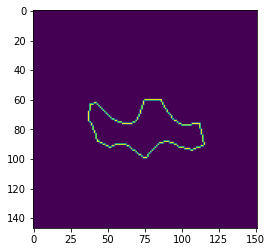

In [65]:
height, width = o.shape 
print(o.shape)
plt.imshow(o)
points = []

for i in range(height): 
    for j in range(width): 
        if o[i][j] != 0: 
            points.append([j, i])

points = np.array(points)
x = points[:, 0]
y = points[:, 1]
# points is now a list which contains the coordinates for each point that matters for our outline

In [99]:
i, j = points[50]
check = 0 
flag = False

def findVertex(masks, j, i): 
    surr =[masks.item((j+2, i-2)),
    masks.item((j+2, i)),
    masks.item((j+2, i+2)),
    masks.item((j, i-2)),
    masks.item((j, i)),
    masks.item((j, i+2)),
    masks.item((j-2, i-2)),
    masks.item((j-2, i)),
    masks.item((j-2, i+2))]
    if len(list(set(surr)))>2: 
        return [j, i]

In [100]:
vertexes = []
for k in range(len(points)): 
    i, j = points[k]
    vert = findVertex(masks, j, i)
    if vert: 
        vertexes.append(vert)

In [121]:
for i in range(len(vertexes)): 
    if len(vertexes[i]) > 1: 
        a, b = vertexes[i]
        for j in range(len(vertexes)): 
            if i != j: 
                c, d = vertexes[j]
                dist = np.sqrt((a - c)**2 + (b - d)**2)
                if dist < 4: 
                    vertexes[j] = -1

In [122]:
vert2 = []
for i in range(len(vertexes)): 
    if vertexes[i][0] > 0: 
        vert2.append(vertexes[i])

print(len(vert2))

11


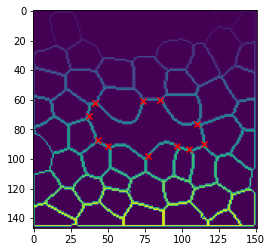

In [123]:
plt.imshow(outlines)
vertexes = np.array(vert2)
x = vertexes[:, 0]
y = vertexes[:, 1]

plt.scatter(y, x, color = "red", marker = "x")

40